In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer

In [2]:
zoo = pd.read_csv("Zoo.csv")
zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [3]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [4]:
categorical_features=[feature for feature in zoo.columns if zoo[feature].dtypes=='O']
categorical_features

['animal name']

In [5]:
for var in categorical_features:
    
    print(var, ' contains ', len(zoo[var].unique()), ' labels')

animal name  contains  100  labels


In [6]:
zoo.shape


(101, 18)

In [9]:
y=zoo['type'].values
X=zoo.drop(['type','animal name'],axis=1).values

In [11]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=42)
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [13]:
knn.score(X_train,y_train)

0.8857142857142857

In [14]:
knn.score(X_test,y_test)

0.8064516129032258

In [15]:
pred = knn.predict(X_test)
pred

array([1, 1, 4, 1, 1, 6, 1, 1, 1, 1, 4, 6, 6, 2, 4, 1, 1, 2, 4, 1, 4, 3,
       1, 6, 1, 7, 6, 6, 1, 1, 2], dtype=int64)

In [16]:
# Evaluate the model
from sklearn.metrics import accuracy_score


In [18]:
print(accuracy_score(y_test, pred))

0.8064516129032258


In [19]:
pd.crosstab(y_test, pred, rownames = ['Actual'], colnames= ['Predictions']) 

Predictions,1,2,3,4,6,7
Actual,,,,,,
1,14,0,0,1,0,0
2,0,3,0,0,0,0
3,0,0,0,1,0,0
4,0,0,0,2,0,0
5,1,0,1,0,0,0
6,0,0,0,0,5,0
7,0,0,0,1,1,1


In [20]:
pred_train = knn.predict(X_train)
print(accuracy_score(y_train, pred_train))

0.8857142857142857


In [22]:
# error on train data
pd.crosstab(y_train, pred_train, rownames=['Actual'], colnames = ['Predictions']) 

Predictions,1,2,4,6,7
Actual,,,,,
1,24,0,2,0,0
2,0,17,0,0,0
3,2,0,2,0,0
4,0,0,11,0,0
5,2,0,0,0,0
6,0,0,0,3,0
7,0,0,0,0,7


In [23]:
# creating empty list variable 
acc = []

# running KNN algorithm for 3 to 50 nearest neighbours(odd numbers) and 
# storing the accuracy values

for i in range(3,50,2):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, y_train)
    train_acc = np.mean(neigh.predict(X_train) == y_train)
    test_acc = np.mean(neigh.predict(X_test) == y_test)
    acc.append([train_acc, test_acc])

In [24]:
import matplotlib.pyplot as plt # library to do visualizations 

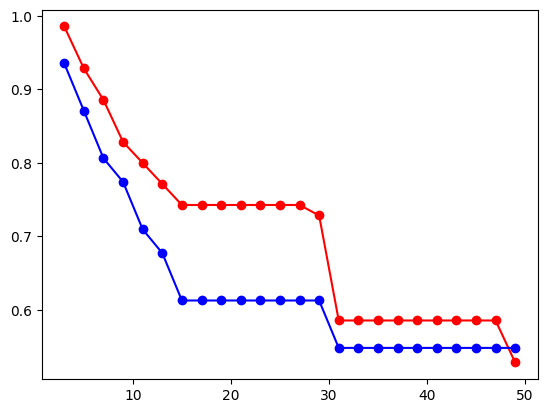

In [25]:
# train accuracy plot 
plt.plot(np.arange(3,50,2),[i[0] for i in acc],"ro-")
plt.plot(np.arange(3,50,2),[i[1] for i in acc],"bo-")
plt.show()

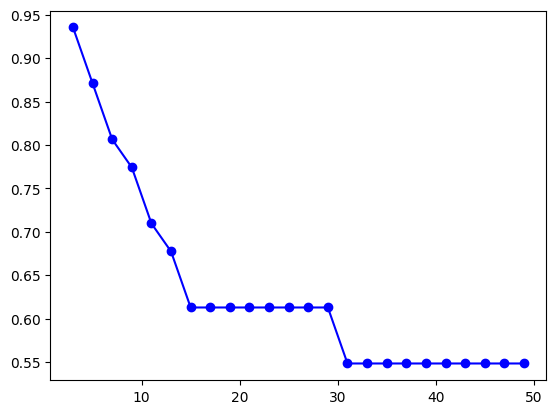

In [26]:
# test accuracy plot
plt.plot(np.arange(3,50,2),[i[1] for i in acc],"bo-")
plt.show()